In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [295]:
dict = {
    "<PAD>": 0,"<UNK>": 1,"<START>": 2,"<STOP>": 3,"(": 4,")": 5,"1": 6,"2": 7,"3": 8,"4": 9,"5": 10,"6": 11,"7": 12,"8": 13,"9": 14,"%10": 15,"%11": 16,"%12": 17,"%13": 18,"%14": 19,"%15": 20,"%16": 21,"%17": 22,"%18": 23,"%19": 24,"%20": 25,"%21": 26,"%22": 27,"%23": 28,"%24": 29,"%25": 30,"%26": 31,"%27": 32,"%28": 33,"%29": 34,"O": 35,"N": 36,"=": 37,"C": 38," ": 39,"Cl": 40,".": 41,"[Pt]": 42,"F": 43,"S": 44,"#": 45,"I": 46,"[Pt+2]": 47,"[NH-]": 48,"[O-]": 49,"[N+]": 50,"B": 51,"P": 52,"Br": 53,"[S+]": 54,"[Br-]": 55
}

In [296]:
# 研究什么癌症
OncotreeCode = ['LUAD']
# Cyclophosphamide Cisplatin
drug_name = 'Cisplatin'

In [297]:
df_smiles = pd.read_csv('../../data/CCLE-GDSC-SMILES.csv')
df_smiles.head()

,CID,SMILES,DRUG_NAME
0,24360,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,Camptothecin
1,13342,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,Vinblastine
2,5702198,N.N.Cl[Pt]Cl,Cisplatin
3,6253,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,Cytarabine
4,148124,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,Docetaxel


In [298]:
df_smiles_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_smiles_attentions_gep.csv')
# 筛选药物 drug = 'Oxaliplatin'
df_smiles_att = df_smiles_att[df_smiles_att['drug'].isin([drug_name])]
# 筛选癌症
df_smiles_att = df_smiles_att[df_smiles_att['OncotreeCode'].isin(OncotreeCode)]
print(df_smiles_att.shape)
df_smiles_att.head()

(4, 259)


,drug,OncotreeCode,cell_line,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
9541,Cisplatin,LUAD,HCC827,0.002383,0.003093,0.002735,0.004979,0.004283,0.004993,0.001796,...,0.005513,0.005884,0.022243,0.012385,0.019265,0.020629,0.024313,0.020199,0.012004,0.017610
9762,Cisplatin,LUAD,PC14,0.002426,0.003137,0.002791,0.004996,0.004331,0.005031,0.001829,...,0.004860,0.006409,0.022500,0.013209,0.010855,0.013399,0.021381,0.019413,0.013964,0.020861
10207,Cisplatin,LUAD,NCIH2228,0.002433,0.003133,0.002807,0.005038,0.004335,0.005026,0.001832,...,0.004758,0.006295,0.022392,0.013230,0.011002,0.013470,0.021335,0.019481,0.014177,0.020979
11255,Cisplatin,LUAD,NCIH1355,0.002414,0.003138,0.002812,0.004984,0.004328,0.005035,0.001827,...,0.004124,0.006827,0.011289,0.010229,0.023058,0.015717,0.021270,0.022152,0.012291,0.019380


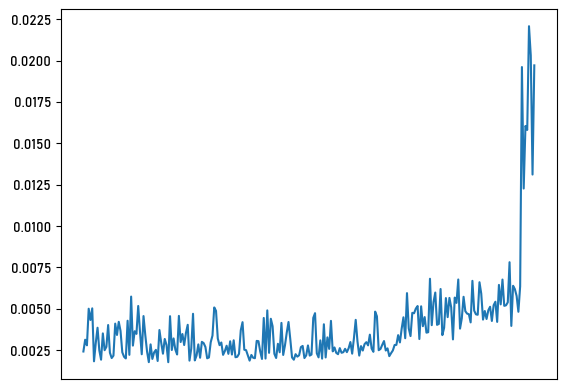

In [299]:
# 将df_smiles_att_oxaliplatin从第四列开始的数据取均值
df_smiles_att_single_drug_mean = df_smiles_att.iloc[:, 3:].mean(axis=0)
# 将df_smiles_att_oxaliplatin_mean画成折线图
plt.plot(df_smiles_att_single_drug_mean)
# 不显示X轴的信息
plt.xticks([])
plt.show()

In [300]:
from pytoda.smiles import SMILESTokenizer
smiles_language_filepath = '../../../data/smiles_language/tokenizer_customized'
# Load SMILES language
smiles_language = SMILESTokenizer.from_pretrained(smiles_language_filepath)
smiles_language.set_encoding_transforms(
    add_start_and_stop=True,
    padding=True,
    padding_length=256,
    # padding_length=params.get("smiles_padding_length", None),
)
smiles_language.set_smiles_transforms(
    augment=False,
    canonical=False,
    kekulize=False,
    all_bonds_explicit=False,
    all_hs_explicit=False,
    remove_bonddir=False,
    remove_chirality=False,
    selfies=False,
    sanitize=False,
)
smiles_language.add_dataset(df_smiles['SMILES'])

In [301]:
single_drug = smiles_language.smiles_to_token_indexes(df_smiles[df_smiles['DRUG_NAME'] == drug_name]['SMILES'].values[0])
single_drug_num_array = np.array(single_drug)
type(single_drug_num_array)

numpy.ndarray

In [302]:
# 根据dict将药物从数字替换成字符
single_drug_strs = [list(dict.keys())[list(dict.values()).index(i)] for i in single_drug]
# 将Oxaliplatin转换成ndarray
single_drug_strs = np.array(single_drug_strs)
type(single_drug_strs)

numpy.ndarray

In [303]:
df_smiles_att_oxaliplatin_mean = df_smiles_att_single_drug_mean.to_numpy()
type(df_smiles_att_oxaliplatin_mean)

numpy.ndarray

In [309]:
single_drug_observe = np.vstack([single_drug_num_array, single_drug_strs, df_smiles_att_oxaliplatin_mean])
single_drug_observe

array([['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0'

In [310]:
start = 248
end = 255
# 取single_drug_observe224-255的数据
single_drug_observe_start_end = single_drug_observe[:, start:end]
# dataframe
# single_drug_observe_224_255 = pd.DataFrame(single_drug_observe_224_255)
single_drug_observe_start_end

array([['36', '41', '36', '41', '40', '42', '40'],
       ['N', '.', 'N', '.', 'Cl', '[Pt]', 'Cl'],
       ['0.01960631875', '0.012263095', '0.01604491425',
        '0.015803940500000002', '0.02207462', '0.020311277750000002',
        '0.01310890675']], dtype='<U32')

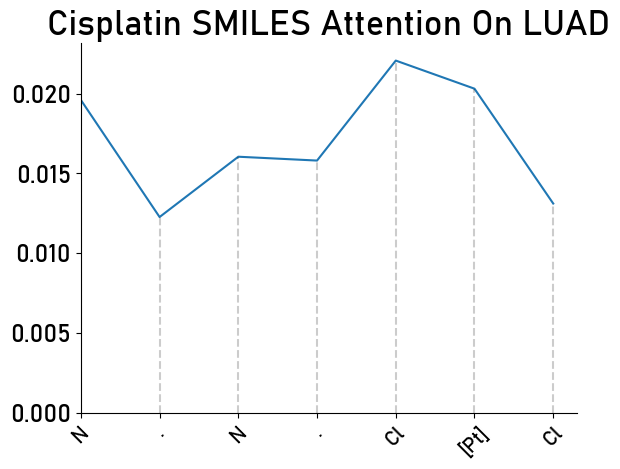

In [311]:
# 将single_drug_observe_224_255画成折线图,第三行是attention，是数值型，所以画成折线图
# 将single_drug_observe_224_255[2]变成浮点数  
single_drug_observe_y = single_drug_observe_start_end[2].astype(float)
single_drug_observe_x = single_drug_observe_start_end[1]
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
# plt.figure(figsize=(15, 6))
plt.plot(single_drug_observe_y)
# 每个点与X轴加上虚线
for i in range(len(single_drug_observe_y)):
    plt.vlines(i, 0, single_drug_observe_y[i], linestyles='dashed', colors='black', alpha=0.2)
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On '+OncotreeCode[0], fontsize=25)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), single_drug_observe_x)
plt.ylim(bottom=0)
plt.xlim(left=0)

# plt.savefig(drug_name + '_SMILES_Attention_Observation.png', dpi=300, bbox_inches='tight')
plt.show()

In [312]:
# 分别取出single_drug_observe_224_255的第二行和第三行
single_drug_observe_start_end_smiles = single_drug_observe_start_end[1]
# 将single_drug_observe_224_255_smiles转换成字符串
single_drug_observe_start_end_smiles = ''.join(single_drug_observe_start_end_smiles)
print(single_drug_observe_start_end_smiles)
single_drug_observe_start_end_weight = single_drug_observe_start_end[2].astype(float)
print(single_drug_observe_start_end_weight)

N.N.Cl[Pt]Cl
[0.01960632 0.01226309 0.01604491 0.01580394 0.02207462 0.02031128
 0.01310891]


In [315]:
from rdkit import Chem
from rdkit.Chem import Draw


# 解析Canonical SMILES
mol = Chem.MolFromSmiles(single_drug_observe_start_end_smiles)

# 生成黑白分子图像
img = Draw.MolToImage(mol, size=(300,300))

# 保存图像为PNG文件
img.save('molecule.png')

print('分子结构图已生成!')

分子结构图已生成!


2
7
12


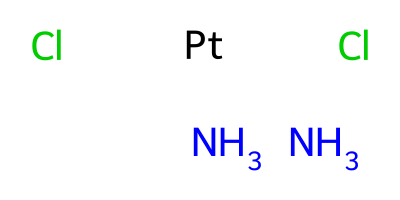

In [313]:
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

# 解析Canonical SMILES
mol = Chem.MolFromSmiles(single_drug_observe_start_end_smiles)

# 找到权重的最大值和最小值
min_weight = min(single_drug_observe_start_end_weight)
max_weight = max(single_drug_observe_start_end_weight)

from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

# Compute 2D coordinates for the molecule
rdDepictor.Compute2DCoords(mol)

# Create a new drawing canvas
drawer = rdMolDraw2D.MolDraw2DSVG(400, 200)

# This will automatically adjust the thickness of the bonds based on their weight
opts = drawer.drawOptions()
print(mol.GetNumBonds())
print(len(single_drug_observe_start_end_weight))
print(len(single_drug_observe_start_end_smiles))
for i in range(mol.GetNumBonds()):
    bond = mol.GetBondWithIdx(i)
    # 获取第i个化学分子符号
    
    bond_weight = single_drug_observe_start_end_weight[i]
    normalized_weight = (bond_weight - min_weight) / (max_weight - min_weight)
    opts.bondLineWidth = int(normalized_weight * 5.0)
    

# Draw the molecule with the modified bond thickness
drawer.DrawMolecule(mol)
drawer.FinishDrawing()

# Display the molecule
svg = drawer.GetDrawingText().replace('svg:', '')
SVG(svg)